Exercise 1: Reading and Exploring Raster Data
Open the single-band DEM image using rasterio.

Retrieve and print the raster metadata, including the CRS, resolution, bounds, number of bands, and data types.

Display the raster’s width, height, and pixel data types to understand the grid dimensions and data structure.

single_band_image = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"

multispectral_image = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

In [3]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# I am using a local file, the online file is in the markdown above
single_band_image = r"C:\Users\pc\Downloads\dem_90m (2).tif"

# multispectral_image = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

#display the metadata
single_src = rasterio.open(single_band_image)
single_src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [15]:
print(single_src.shape)

print(single_src.dtypes)

(3113, 4269)
('int16',)


Exercise 2: Visualizing and Manipulating Raster Bands
Visualize the single-band DEM using a custom colormap (e.g., cmap=’terrain’).

Open the multispectral image and visualize the first band using a suitable colormap.

Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

<Axes: title={'center': 'Single-band DEM Visualization (terrain colormap)'}>

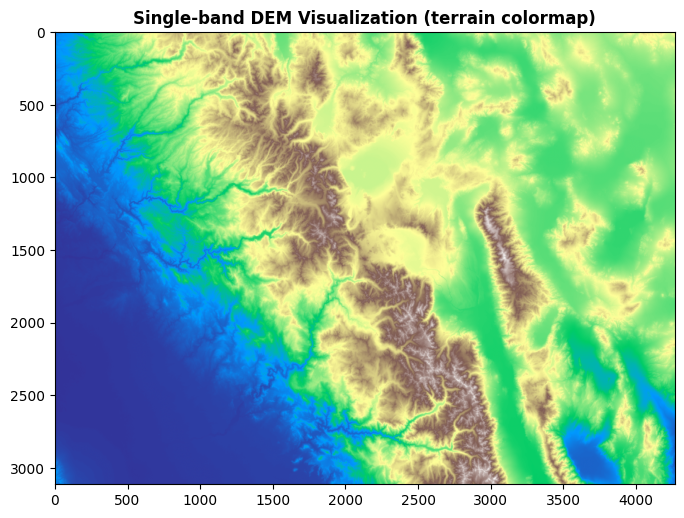

In [20]:
# Visualize the single-band DEM using a custom colormap (terrain)
dem_data = single_src.read(1)
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(dem_data, ax=ax, cmap='terrain', title="Single-band DEM Visualization (terrain colormap)")



<Axes: title={'center': 'First Band of Multispectral Image (Grayscale)'}>

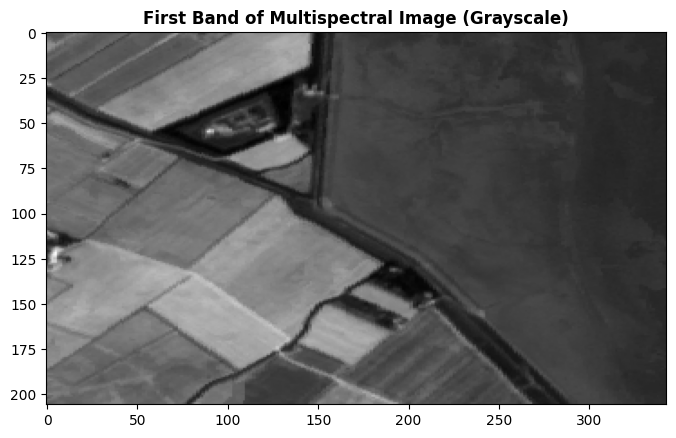

In [36]:
multi_spectral_src = r"C:\Users\pc\Downloads\cog (3).tif"
multi_src = rasterio.open(multi_spectral_src)

first_band = multi_src.read(1)
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(first_band, ax=ax, cmap='gray', title="First Band of Multispectral Image (Grayscale)")

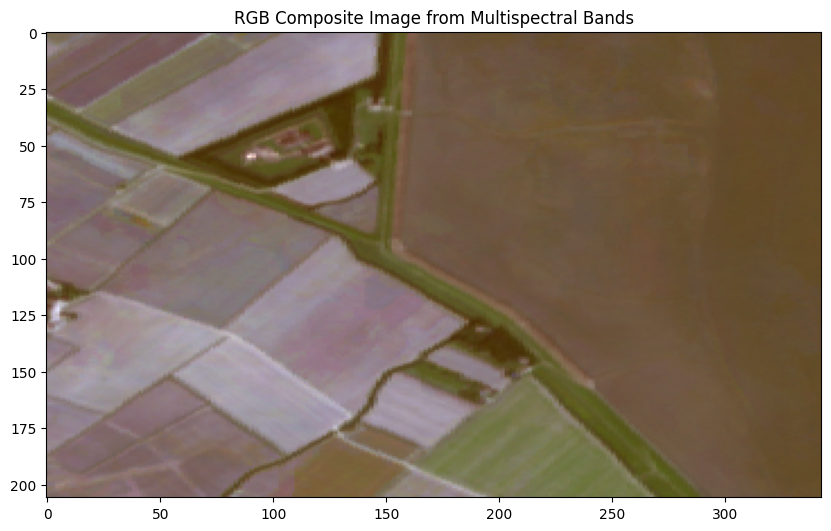

In [72]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]
# Read Red (band 4), Green (band 3), and Blue (band 2) bands from the multispectral image
blue = multi_src.read(1)
green = multi_src.read(2)
red = multi_src.read(3)

# Stack bands to create an RGB composite (order: Red, Green, Blue)
rgb = np.dstack((red, green, blue))

# Normalize for display (optional, improves visualization)
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

plt.figure(figsize=(10, 10))
plt.imshow(rgb_norm)
plt.title("RGB Composite Image from Multispectral Bands")
plt.show()

Exercise 3: Raster Clipping with Array Indexing
Open the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).

Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.

Save the clipped raster subset to a new file named clipped_multispectral.tif.

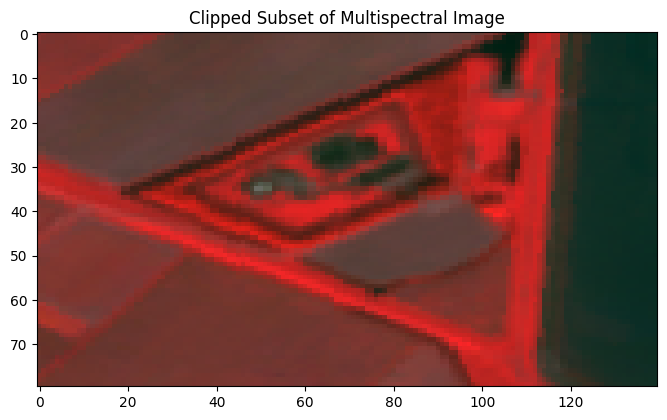

In [58]:
multi_data = multi_src.read()
multi_data.shape

subset = multi_data[:, 20:100, 40:180]
rgb_subset = np.dstack((subset[3], subset[2], subset[1]))
rgb_subset.shape

rgb_norm = (rgb_subset - rgb_subset.min()) / (rgb_subset.max() - rgb_subset.min())
# Visualize the clipped portion (first band)
plt.figure(figsize=(8, 8))
plt.imshow(rgb_norm)
plt.title("Clipped Subset of Multispectral Image")
plt.show()

In [59]:
output_path = "rgb_composite.tif"
with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=rgb_norm.shape[0],
    width=rgb_norm.shape[1],
    count=3,
    dtype=rgb_norm.dtype,
    crs=multi_src.crs,
    transform=multi_src.transform,
) as dst:
    # Write each band separately
    for i in range(3):
        dst.write(rgb_norm[:, :, i], i + 1)

Exercise 4: Calculating NDWI (Band Math)
Open the multispectral image and extract the Green and Near-Infrared (NIR) bands. This multispectral image has the following band order:

Band 2: Blue

Band 3: Green

Band 4: Red

Band 5: NIR

Compute the Normalized Difference Water Index (NDWI) using the formula:

NDWI= (Green - NIR) / (Green + NIR)

Visualize the NDWI result using a water-friendly colormap (e.g., cmap=’Blues’) to highlight water bodies.

Save the resulting NDWI image as a new raster file named ndwi.tif.



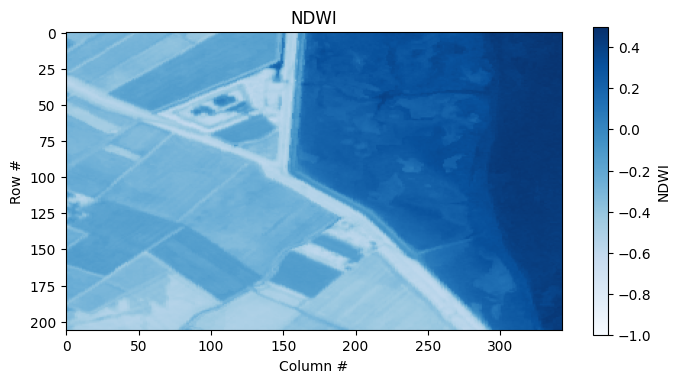

In [94]:
# Calculate NDWI using Green (band 3) and NIR (band 4)
nir = multi_src.read(4)
ndwi = (green - nir) / (green + nir)

# Visualize the NDWI result
plt.figure(figsize=(8, 8))
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=0.5)
plt.colorbar(label="NDWI", shrink=0.5)
plt.title("NDWI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

In [89]:
# Save the NDWI result as a new raster file named ndwi.tif
with rasterio.open(
    "ndwi.tif",
    "w",
    driver="GTiff",
    height=ndwi.shape[0],
    width=ndwi.shape[1],
    count=1,
    dtype=ndwi.dtype,
    crs=multi_src.crs,
    transform=multi_src.transform,
) as dst:
    dst.write(ndwi, 1)

Exercise 5: Reprojecting Raster Data
Reproject the single-band DEM raster from its original CRS to EPSG:4326 (WGS 84) using the rasterio.warp.reproject function.

Save the reprojected raster to a new GeoTIFF file named reprojected_dem.tif.

Visualize both the original and reprojected DEM datasets to compare how the reprojection affects the spatial coverage and resolution.

In [90]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Open the original DEM
src = rasterio.open(single_band_image)
dem_data = src.read(1)

# Set target CRS
dst_crs = "EPSG:4326"

# Calculate transform and shape for the new CRS
transform, width, height = calculate_default_transform(
    src.crs, dst_crs, src.width, src.height, *src.bounds
)

# Prepare output array
reprojected_dem = np.empty((height, width), dtype=dem_data.dtype)

# Reproject
reproject(
    source=dem_data,
    destination=reprojected_dem,
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

# Save to new GeoTIFF
with rasterio.open(
    "reprojected_dem.tif",
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype=dem_data.dtype,
    crs=dst_crs,
    transform=transform,
) as dst:
    dst.write(reprojected_dem, 1)



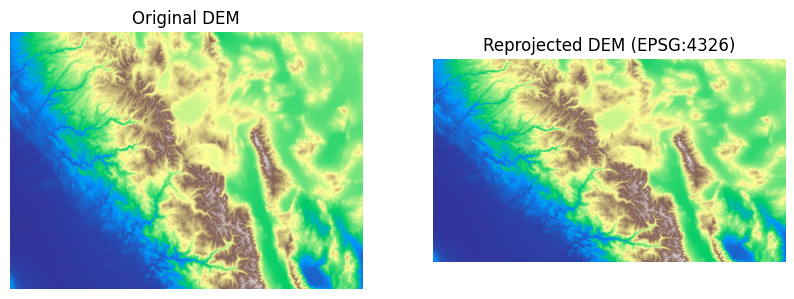

In [91]:
# Visualize original DEM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dem_data, cmap="terrain")
plt.title("Original DEM")
plt.axis('off')

# Visualize reprojected DEM
plt.subplot(1, 2, 2)
plt.imshow(reprojected_dem, cmap="terrain")
plt.title("Reprojected DEM (EPSG:4326)")
plt.axis('off')
plt.show()